In [1]:
import cv2
import sys
from matplotlib import pyplot as plt 
import numpy as np 

In [2]:
img = cv2.VideoCapture(0)

In [3]:
ret, frame = img.read()#read image and return true on success 

In [4]:
img.release() #close camera

In [5]:
frameRGB = frame[:,:,::-1] #convert BGR=> RGB (OpenCV has default BGR)

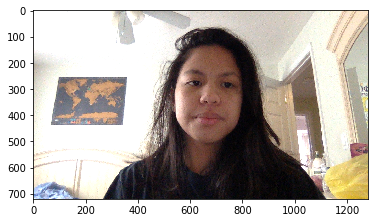

In [6]:
plt.imshow(frameRGB) 

In [7]:
cap = cv2.VideoCapture(0)

In [8]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.load('haarcascade_frontalface_default.xml') == False:
    print("Please put .xml files in the same directory")
else: 
    print("Whooo")

Whooo


In [9]:
ret, img = cap.read()  
  
#converts to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

#Multiple faces 
faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
for (x,y,w,h) in faces: 
    # To draw a rectangle in a face  
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
 



In [10]:
img = img[:,:,::-1] #BGR => RGB OTHERWISE ITS GONNA BE BLUE 

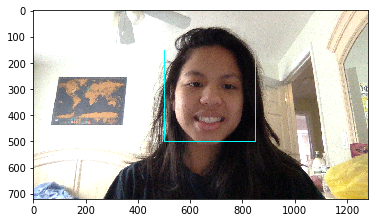

In [11]:
plt.imshow(img) 

In [12]:
#close camera 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()  

Used numpy slicing to crop the face 

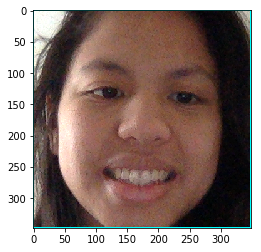

In [13]:
img_face = roi_color[:,:,::-1]
img_f = roi_color
plt.imshow(img_face) 

Made a filter of 7 x 7 filled with 1 divided by 49 normalization 

In [35]:
blur_filter3 = np.ones((7, 7), np.float)/(49.0) 

In [36]:
image_blur1 = cv2.filter2D(img, -1, blur_filter3) 

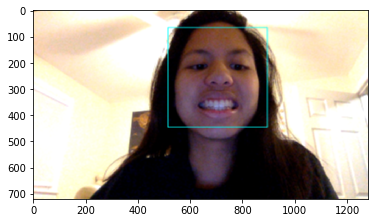

In [37]:
plt.imshow(image_blur1)

Let's try brightenning my teeth using binary mask 

In [38]:
im_gray = cv2.cvtColor(img_face, cv2.COLOR_BGR2GRAY)

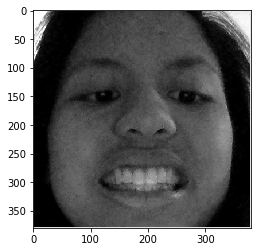

In [39]:
plt.imshow(im_gray, cmap="gray")#vidris shows but added cmap to gray 

In [40]:
_, mask = cv2.threshold(im_gray, thresh=10, maxval=255, type=cv2.THRESH_BINARY)
im_thresh_gray = cv2.bitwise_and(im_gray, mask)

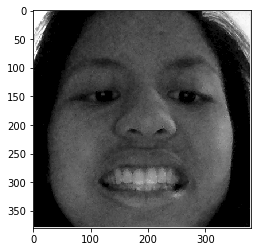

In [41]:
plt.imshow(im_thresh_gray, cmap = "gray")

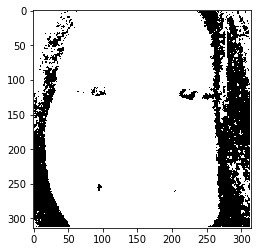

In [703]:
mask3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 
plt.imshow(mask3)

In [704]:
im_thresh_color = cv2.bitwise_and(mask3, img_face)

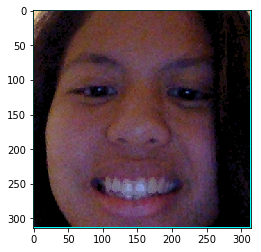

In [705]:
plt.imshow(im_thresh_color)

In [654]:
print(type(img_face))

<class 'numpy.ndarray'>


In [641]:
print(img_face[0])

[[  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 

In [642]:
value = 76

In [643]:
res = np.where((255 - img_face) < 100,255,img_face+value)

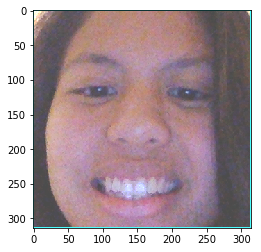

In [667]:
plt.imshow(res, cmap = "gray")

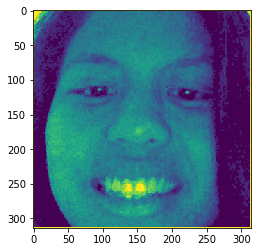

In [715]:
res1 = np.where((255 - im_thresh_gray) < 100,255,im_thresh_gray+100)
plt.imshow(res1)

cond = res1<128
print(cond)

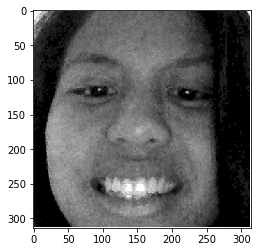

In [670]:
plt.imshow(res1, cmap = "gray")

In [711]:
im_thresh_color2 = cv2.bitwise_and(img_face, res)

In [712]:
im_thresh_color3 = cv2.bitwise_and(res, im_thresh_color2)

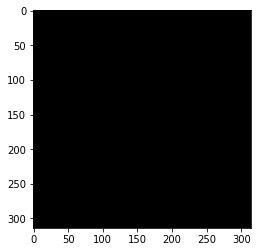

In [713]:
plt.imshow(im_thresh_color2)

In [691]:
img_yuv = cv2.cvtColor(frameRGB, cv2.COLOR_BGR2YUV)

In [692]:
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

In [693]:
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

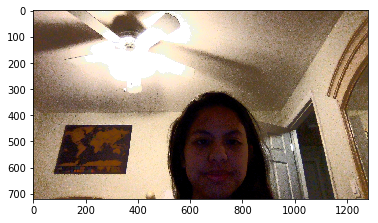

In [694]:
plt.imshow(img_output)

In [656]:
img_7 = cv2.cvtColor(img_face, cv2.COLOR_BGR2HSV)

In [3]:
# Webcamera no 0 is used to capture the frames 
cap = cv2.VideoCapture(0)  

In [ ]:
while(1):        
    # Captures the live stream frame-by-frame 
    _, frame = cap.read()  
    # Converts images from BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    lower_red = np.array([110,50,50]) 
    upper_red = np.array([130,255,255]) 